<!-- !pip install PyPDF2 -->

In [ ]:
# !pip install PyPDF2

In [ ]:
# !pip install textract

In [46]:
#importing required modules

import PyPDF2

#creating a pdf file object
pdfFileObj = open('Lorem_ipsum.pdf', 'rb')



In [47]:
#creating a pdf reader object
pdfReader = PyPDF2.PdfReader(pdfFileObj)
pdfReader

In [48]:
#printing number of pages in pdf file
print(len(pdfReader.pages))

1


In [49]:
# creating a page object
pageObj = pdfReader.pages[0]
pageObj

{'/Type': '/Page',
 '/Parent': {'/Type': '/Pages',
  '/Count': 1,
  '/Kids': [IndirectObject(3, 0, 140665152904352)]},
 '/Resources': {'/Font': {'/F1': {'/Type': '/Font',
    '/Subtype': '/TrueType',
    '/Name': '/F1',
    '/BaseFont': '/ABCDEE+Calibri',
    '/Encoding': '/WinAnsiEncoding',
    '/FontDescriptor': {'/Type': '/FontDescriptor',
     '/FontName': '/ABCDEE+Calibri',
     '/Flags': 32,
     '/ItalicAngle': 0,
     '/Ascent': 750,
     '/Descent': -250,
     '/CapHeight': 750,
     '/AvgWidth': 503,
     '/MaxWidth': 1690,
     '/FontWeight': 400,
     '/XHeight': 250,
     '/StemV': 50,
     '/FontBBox': [-476, -250, 1214, 750],
     '/FontFile2': {'/Filter': '/FlateDecode', '/Length1': 124424}},
    '/FirstChar': 32,
    '/LastChar': 121,
    '/Widths': [226,
     0,
     0,
     0,
     0,
     0,
     0,
     221,
     0,
     0,
     0,
     0,
     250,
     0,
     252,
     0,
     507,
     507,
     0,
     0,
     0,
     507,
     507,
     0,
     0,
     507,
 

In [50]:
# extracting text from page
print(pageObj.extract_text())

Test PDF  
Lorem Ipsum is simply dummy text of the printing and typesetting industry. Lorem Ipsum has been the 
industry's standard dummy text ever since the 1500s, when an unknown printer took a galley of type 
and scrambled it to make a type specimen book. It has sur vived not only five centuries, but also the leap 
into electronic typesetting, remaining essentially unchanged. It was popularised in the 1960s with the 
release of Letraset sheets containing Lorem Ipsum passages, and more recently with desktop publishing 
software like Aldus PageMaker including versions of Lorem Ipsum.  
Lorem Ipsum is simply dummy text of the printing and typesetting industry. Lorem Ipsum has been the 
industry's standard dummy text ever since the 1500s, when an unknown printer took a galley of type 
and scrambled it to make a type specimen book. It has survived not only five centuries, but also the leap 
into electronic typesetting, remaining essentially unchanged. It was popularised in the 1960s with

In [51]:
# pdfReader.close()

In [52]:
c = 0
text = ""

while c<len(pdfReader.pages):
    pageObj = pdfReader.pages[c]
    c+=1
    text += pageObj.extract_text()
print(text)

Test PDF  
Lorem Ipsum is simply dummy text of the printing and typesetting industry. Lorem Ipsum has been the 
industry's standard dummy text ever since the 1500s, when an unknown printer took a galley of type 
and scrambled it to make a type specimen book. It has sur vived not only five centuries, but also the leap 
into electronic typesetting, remaining essentially unchanged. It was popularised in the 1960s with the 
release of Letraset sheets containing Lorem Ipsum passages, and more recently with desktop publishing 
software like Aldus PageMaker including versions of Lorem Ipsum.  
Lorem Ipsum is simply dummy text of the printing and typesetting industry. Lorem Ipsum has been the 
industry's standard dummy text ever since the 1500s, when an unknown printer took a galley of type 
and scrambled it to make a type specimen book. It has survived not only five centuries, but also the leap 
into electronic typesetting, remaining essentially unchanged. It was popularised in the 1960s with

### Writing to PDF file

In [53]:
page_one = pdfReader.pages[0]
pdf_document_writer = PyPDF2.PdfWriter()
pdf_document_writer.add_page(page_one)
pdf_output = open("new_file.pdf", "wb")
pdf_document_writer.write(pdf_output)
# IMP
pdfFileObj.close()
pdf_document_writer.close()
pdf_output.close()

### Merger of PDFs

In [54]:
def merge_PDF(pdfs:list, output):
    pdfMerger = PyPDF2.PdfMerger()
    
    for pdf in pdfs:
        pdfMerger.append(pdf)
    
    with open(output, 'wb') as f:
        pdfMerger.write(f)

In [56]:
pdfs = ["Lorem_ipsum.pdf", "new_file.pdf"]

output = "combinedPDF.pdf"

merge_PDF(pdfs, output)


### Importing dataset

In [1]:
from sklearn.datasets import fetch_20newsgroups

In [2]:
news = fetch_20newsgroups(subset='all')

In [3]:
print(len(news.data))

18846


In [4]:
print(len(news.target_names))

20


In [5]:
print(news.target_names)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


### Extract features from text file`

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split


import matplotlib.pyplot as plt
import string

In [217]:
def train_test(classifier, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=48)
    classifier.fit(X_train, y_train)
    print("Classifier accuracy Test is {}".format(classifier.score(X_test, y_test)))
    print("Classifier accuracy Train is {}".format(classifier.score(X_train, y_train)))
    
    print("#####################")
    try:
        # predict probabilities
        pred_prob1 = classifier.predict_proba(X_test)
        pred_prob2 = classifier.predict_proba(X_train)

        # roc curve for models
        fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
        fpr2, tpr2, thresh1 = roc_curve(y_train, pred_prob2[:,1], pos_label=2)

        # roc curve for tpr = fpr 
        random_probs = [0 for i in range(len(y_test))]
        p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

        plt.plot(fpr1, tpr1,color='orange', label='test')
        plt.plot(fpr2, tpr2, color='green', label='train')
        plt.title('ROC curve for test')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive rate')
        plt.savefig('Multiclass ROC',dpi=300); 
        plt.show()
        
    except:
        print("")
    
    return classifier


In [218]:
from sklearn.naive_bayes import MultinomialNB

Classifier accuracy Test is 0.8535653650254669
Classifier accuracy Train is 0.9254987972265459
#####################


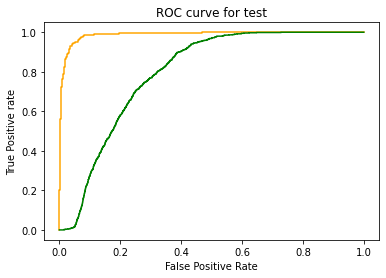

Pipeline(steps=[('vectorize', TfidfVectorizer()),
                ('classifier', MultinomialNB())])

In [219]:
trail1 = Pipeline([("vectorize", TfidfVectorizer()), ("classifier", MultinomialNB())])
train_test(trail1, news.data, news.target)


In [220]:
from nltk.corpus import stopwords

Classifier accuracy Test is 0.8828522920203735
Classifier accuracy Train is 0.9472194707796802
#####################


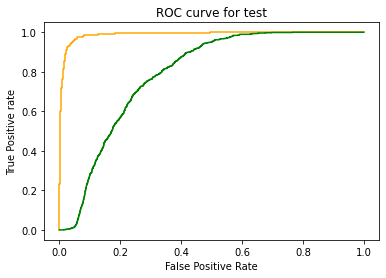

Pipeline(steps=[('vectorize',
                 TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('classifier', MultinomialNB())])

In [221]:
trail2 = Pipeline([("vectorize", TfidfVectorizer(stop_words=stopwords.words('english'))), 
                   ("classifier", MultinomialNB())])
train_test(trail2, news.data, news.target)

Classifier accuracy Test is 0.91553480475382
Classifier accuracy Train is 0.9898118013301259
#####################


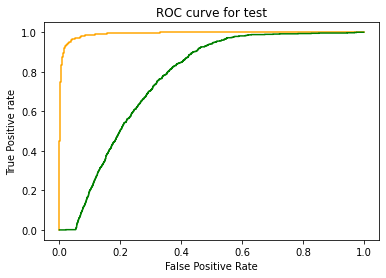

Pipeline(steps=[('vectorize',
                 TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('classifier', MultinomialNB(alpha=0.05))])

In [222]:
trail3 = Pipeline([("vectorize", TfidfVectorizer(stop_words=stopwords.words('english'))), 
                   ("classifier", MultinomialNB(alpha=0.05))])
train_test(trail3, news.data, news.target)

In [223]:
from sklearn import svm

In [224]:
trail5 = Pipeline([("vectorize", TfidfVectorizer(stop_words=stopwords.words('english')+list(string.punctuation), min_df=5)), 
                   ("classifier", svm.LinearSVC())])
train_test(trail5, news.data, news.target)

Classifier accuracy Test is 0.9276315789473685
Classifier accuracy Train is 0.998584972406962
#####################



Pipeline(steps=[('vectorize',
                 TfidfVectorizer(min_df=5,
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('classifier', LinearSVC())])

In [225]:
import xgboost as xgb

Classifier accuracy Test is 0.8486842105263158
Classifier accuracy Train is 0.999929248620348
#####################


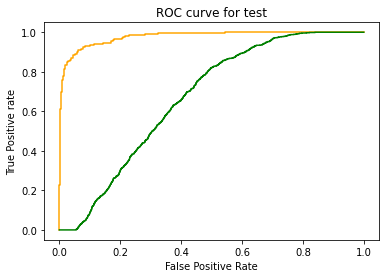

Pipeline(steps=[('vectorize',
                 TfidfVectorizer(min_df=5,
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('classifier',
                 XGBClassifier(base_score=0.5, booster='g...
                               feature_types=None, gamma=0, gpu_id=-1,
                               grow_policy='depthwise', importance_type=None,
                               interaction_constraints='',
     

In [226]:
trail6 = Pipeline([("vectorize", TfidfVectorizer(stop_words=stopwords.words('english')+list(string.punctuation), min_df=5)), 
                   ("classifier", xgb.XGBClassifier(random_state=42))])
train_test(trail6, news.data, news.target)

In [227]:
from sklearn.ensemble import RandomForestClassifier

Classifier accuracy Test is 0.8471986417657046
Classifier accuracy Train is 0.999929248620348
#####################


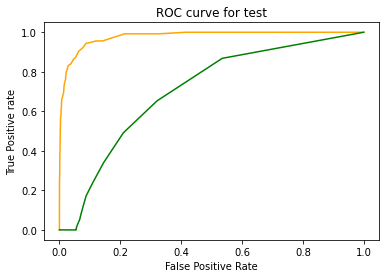

Pipeline(steps=[('vectorize',
                 TfidfVectorizer(min_df=5,
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('classifier', RandomForestClassifier())])

In [228]:
trail7 = Pipeline([("vectorize", TfidfVectorizer(stop_words=stopwords.words('english')+list(string.punctuation), min_df=5)), 
                   ("classifier", RandomForestClassifier())])
                   
train_test(trail7, news.data, news.target)
